<a href="https://colab.research.google.com/github/sidpatil07/new2/blob/main/Comparative_on_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv('loan_prediction.csv')

data = data.dropna()

X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']



In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_classifier = SVC(kernel='linear', C=1)
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

In [ ]:
svm_classifier.fit(X_train, y_train)
naive_bayes_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
ann_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [ ]:
svm_predictions = svm_classifier.predict(X_test)
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
ann_predictions = ann_classifier.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
ann_accuracy = accuracy_score(y_test, ann_predictions)


In [ ]:
results = pd.DataFrame({
    'Algorithm': ['SVM', 'Naive Bayes', 'Decision Tree', 'KNN', 'ANN'],
    'Accuracy': [svm_accuracy, naive_bayes_accuracy, decision_tree_accuracy, knn_accuracy, ann_accuracy]
})

print(results)
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_predictions))

       Algorithm  Accuracy
0            SVM  0.822917
1    Naive Bayes  0.822917
2  Decision Tree  0.729167
3            KNN  0.781250
4            ANN  0.781250

Classification Report for SVM:
              precision    recall  f1-score   support

           N       1.00      0.39      0.56        28
           Y       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



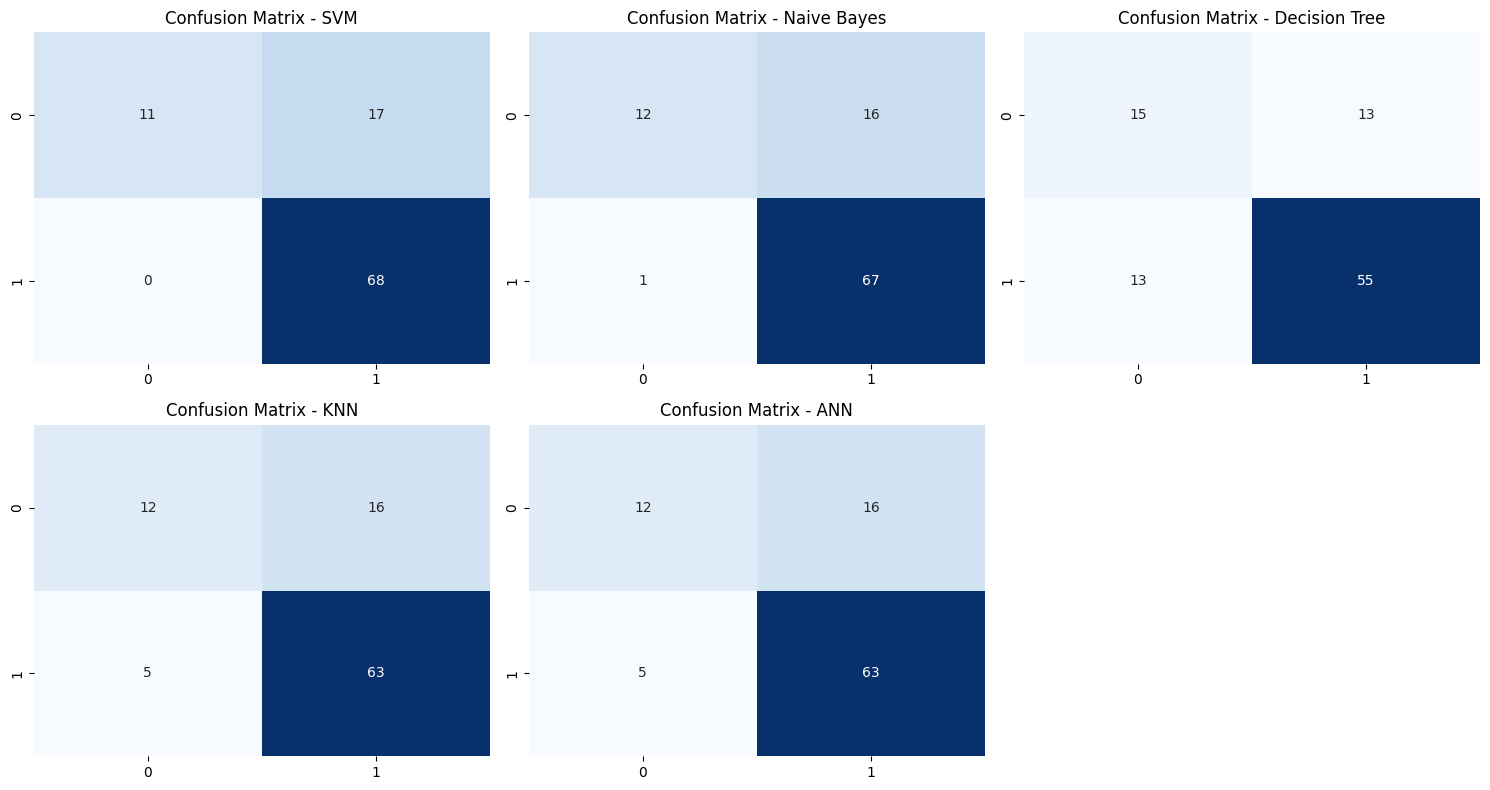

In [ ]:
classifiers = [svm_classifier, naive_bayes_classifier, decision_tree_classifier, knn_classifier, ann_classifier]

plt.figure(figsize=(15, 8))
for i, classifier in enumerate(classifiers, 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {results.loc[i-1, "Algorithm"]}')

plt.tight_layout()
plt.show()